<a href="https://colab.research.google.com/github/japneet18/Advanced_Statistical_Approaches_to_quality/blob/main/6220_project_40229513_final_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/japneet18/Advanced_Statistical_Approaches_to_quality/main/Fish.csv')
df.head(25)


Species  Weight  Length1  Length2  Length3   Height   Width
0    Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1    Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2    Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3    Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4    Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
5    Bream   450.0     26.8     29.7     34.7  13.6024  4.9274
6    Bream   500.0     26.8     29.7     34.5  14.1795  5.2785
7    Bream   390.0     27.6     30.0     35.0  12.6700  4.6900
8    Bream   450.0     27.6     30.0     35.1  14.0049  4.8438
9    Bream   500.0     28.5     30.7     36.2  14.2266  4.9594
10   Bream   475.0     28.4     31.0     36.2  14.2628  5.1042
11   Bream   500.0     28.7     31.0     36.2  14.3714  4.8146
12   Bream   500.0     29.1     31.5     36.4  13.7592  4.3680
13   Bream   340.0     29.5     32.0     37.3  13.9129  5.0728
14   Bream   600.0     29.4     32.0     37.2  14.9544  5.1708
15   Bream   600.0     29.4     32.0     37.2  15.4380  5.5800
16   Bream   700.0     30.4     33.0     38.3  14.8604  5.2854
17   Bream   700.0     30.4     33.0     38.5  14.9380  5.1975
18   Bream   610.0     30.9     33.5     38.6  15.6330  5.1338
19   Bream   650.0     31.0     33.5     38.7  14.4738  5.7276
20   Bream   575.0     31.3     34.0     39.5  15.1285  5.5695
21   Bream   685.0     31.4     34.0     39.2  15.9936  5.3704
22   Bream   620.0     31.5     34.5     39.7  15.5227  5.2801
23   Bream   680.0     31.8     35.0     40.6  15.4686  6.1306
24   Bream   700.0     31.9     35.0     40.5  16.2405  5.5890

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [21]:
print("length of data",len(df))
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())
df=df.dropna(how="any")

length of data 159
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


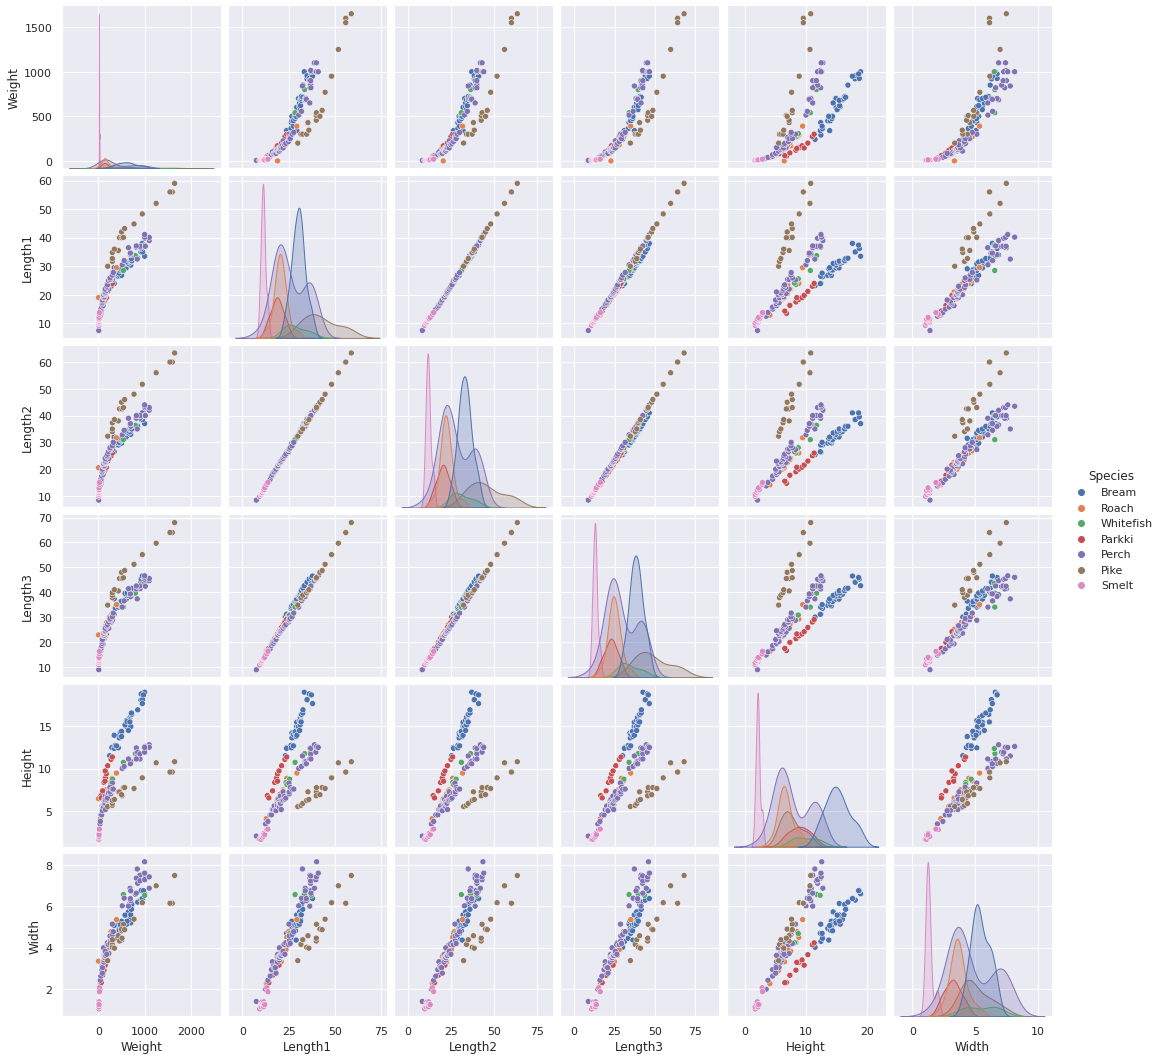

In [22]:
sns.pairplot(df, hue='Species')
plt.show()

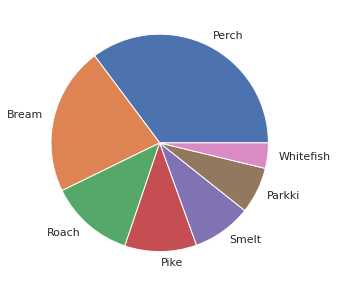

In [23]:
y =df['Species']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [17]:
X = df.drop(columns=['Species'])
X.head(10)

Weight  Length1  Length2  Length3   Height   Width
0   242.0     23.2     25.4     30.0  11.5200  4.0200
1   290.0     24.0     26.3     31.2  12.4800  4.3056
2   340.0     23.9     26.5     31.1  12.3778  4.6961
3   363.0     26.3     29.0     33.5  12.7300  4.4555
4   430.0     26.5     29.0     34.0  12.4440  5.1340
5   450.0     26.8     29.7     34.7  13.6024  4.9274
6   500.0     26.8     29.7     34.5  14.1795  5.2785
7   390.0     27.6     30.0     35.0  12.6700  4.6900
8   450.0     27.6     30.0     35.1  14.0049  4.8438
9   500.0     28.5     30.7     36.2  14.2266  4.9594

In [18]:
X.describe().transpose()

count        mean         std     min        25%       50%       75%  \
Weight   159.0  398.326415  357.978317  0.0000  120.00000  273.0000  650.0000   
Length1  159.0   26.247170    9.996441  7.5000   19.05000   25.2000   32.7000   
Length2  159.0   28.415723   10.716328  8.4000   21.00000   27.3000   35.5000   
Length3  159.0   31.227044   11.610246  8.8000   23.15000   29.4000   39.6500   
Height   159.0    8.970994    4.286208  1.7284    5.94480    7.7860   12.3659   
Width    159.0    4.417486    1.685804  1.0476    3.38565    4.2485    5.5845   

              max  
Weight   1650.000  
Length1    59.000  
Length2    63.400  
Length3    68.000  
Height     18.957  
Width       8.142

In [24]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)


Weight   Length1   Length2   Length3    Height     Width
0 -0.438072 -0.305789 -0.282303 -0.106020  0.596579 -0.236529
1 -0.303562 -0.225507 -0.198054 -0.002337  0.821261 -0.066579
2 -0.163448 -0.235542 -0.179332 -0.010977  0.797341  0.165793
3 -0.098995  0.005302  0.054694  0.196390  0.879771  0.022621
4  0.088759  0.025372  0.054694  0.239592  0.812835  0.426371
5  0.144804  0.055477  0.120222  0.300074  1.083951  0.303431
6  0.284919  0.055477  0.120222  0.282793  1.219018  0.512358
7 -0.023333  0.135759  0.148305  0.325995  0.865729  0.162163
8  0.144804  0.135759  0.148305  0.334635  1.178154  0.253684
9  0.284919  0.226075  0.213832  0.429678  1.230041  0.322473

In [25]:
X.describe().transpose()

count          mean      std       min       25%       50%       75%  \
Weight   159.0  1.955110e-17  1.00316 -1.116227 -0.779952 -0.351201  0.705263   
Length1  159.0 -1.061345e-16  1.00316 -1.881310 -0.722248 -0.105085  0.647552   
Length2  159.0 -1.452367e-16  1.00316 -1.873679 -0.694189 -0.104443  0.663162   
Length3  159.0 -7.820439e-17  1.00316 -1.937763 -0.697880 -0.157862  0.727768   
Height   159.0  4.468822e-17  1.00316 -1.695083 -0.708261 -0.277340  0.794556   
Width    159.0 -2.793014e-16  1.00316 -2.005294 -0.614007 -0.100557  0.694447   

              max  
Weight   3.507554  
Length1  3.286801  
Length2  3.274892  
Length3  3.177292  
Height   2.337161  
Width    2.216321

In [26]:
observations = list(df.index)
variables = list(df.columns)

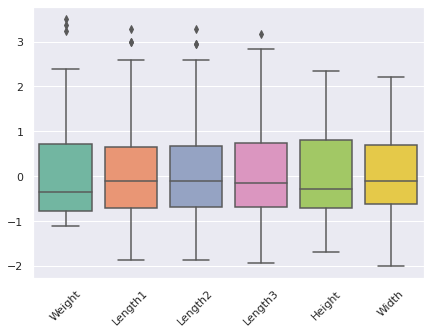

In [27]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

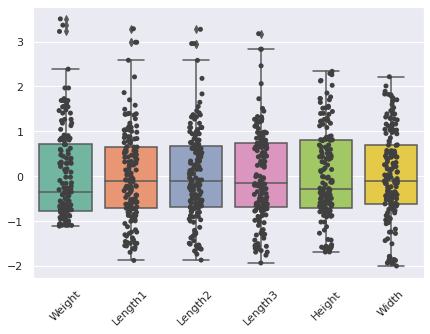

In [28]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

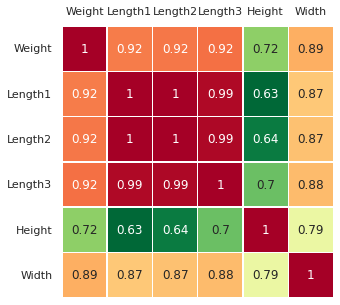

In [14]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, '')

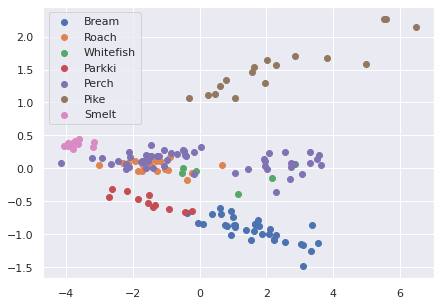

In [41]:
pca = PCA()
Z = pca.fit_transform(X)

idx_Bream = np.where(y == 'Bream')
idx_Roach = np.where(y == 'Roach')
idx_Whitefish= np.where(y == 'Whitefish')
idx_Parkki = np.where(y == 'Parkki')
idx_Perch = np.where(y == 'Perch')
idx_Pike= np.where(y == 'Pike')
idx_Smelt= np.where(y == 'Smelt')

plt. figure()
plt.scatter(Z[idx_Bream,0], Z[idx_Bream,1], label='Bream')
plt.scatter(Z[idx_Roach,0], Z[idx_Roach,1], label='Roach')
plt.scatter(Z[idx_Whitefish,0], Z[idx_Whitefish,1], label='Whitefish')
plt.scatter(Z[idx_Parkki,0], Z[idx_Parkki,1], label='Parkki')
plt.scatter(Z[idx_Perch,0], Z[idx_Perch,1], label='Perch')
plt.scatter(Z[idx_Pike,0], Z[idx_Pike,1], label='Pike')
plt.scatter(Z[idx_Smelt,0], Z[idx_Smelt,1], label='Smelt')

plt.legend()
plt.xlabel('')
plt.ylabel('')
     

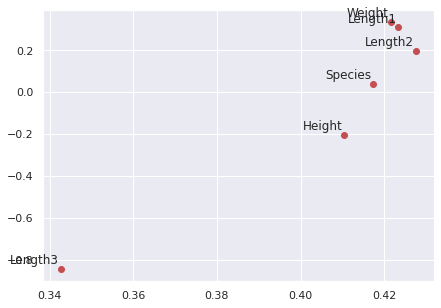

In [42]:

A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


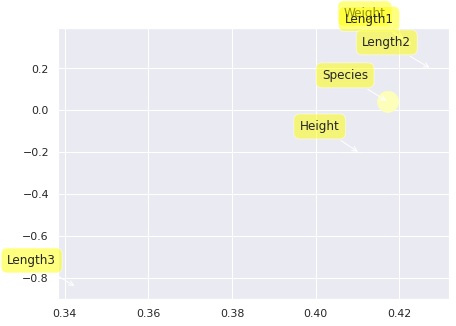

In [43]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

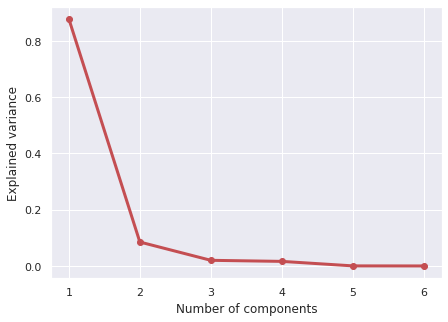

In [44]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

Text(0, 0.5, 'Cumulative explained variance')

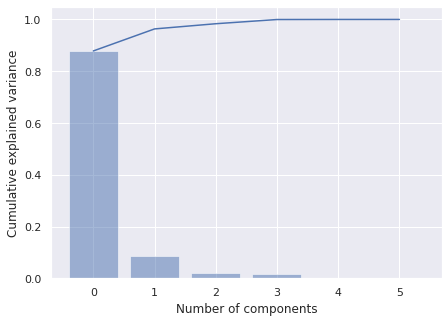

In [45]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

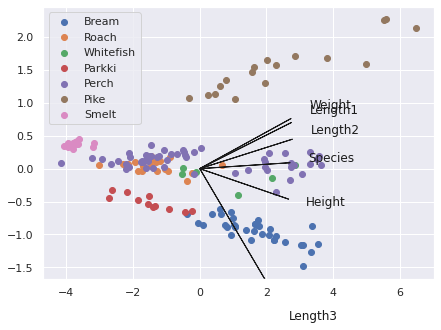

In [46]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('')
plt.ylabel('')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Bream,0], Z[idx_Bream,1], label='Bream')
plt.scatter(Z[idx_Roach,0], Z[idx_Roach,1], label='Roach')
plt.scatter(Z[idx_Whitefish,0], Z[idx_Whitefish,1], label='Whitefish')
plt.scatter(Z[idx_Parkki,0], Z[idx_Parkki,1], label='Parkki')
plt.scatter(Z[idx_Perch,0], Z[idx_Perch,1], label='Perch')
plt.scatter(Z[idx_Pike,0], Z[idx_Pike,1], label='Pike')
plt.scatter(Z[idx_Smelt,0], Z[idx_Smelt,1], label='Smelt')
plt.legend(loc='upper left')
     

In [29]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [48]:
out['PC']

PC1       PC2
0   -0.369223 -0.682427
1   -0.052464 -0.827850
2    0.093203 -0.848837
3    0.378876 -0.692796
4    0.626966 -0.696093
..        ...       ...
154 -3.667425  0.414093
155 -3.649135  0.376565
156 -3.614248  0.444107
157 -3.209690  0.327234
158 -3.160537  0.395774

[159 rows x 2 columns]

[colourmap]> Warning: Colormap [Set1] can not create [159] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [159] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbd52f6cdf0>)

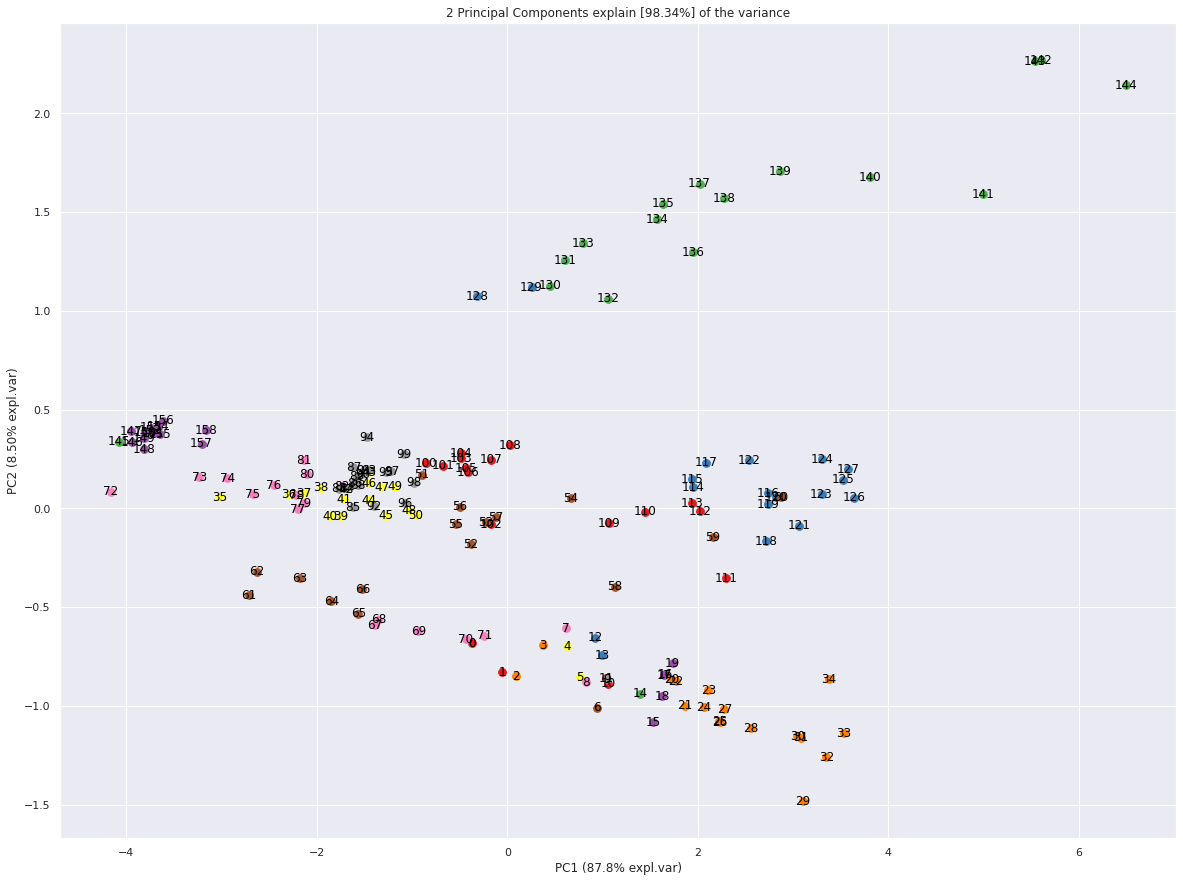

In [49]:
model.scatter(label=True, legend=False)

In [53]:
A = out['loadings'].T

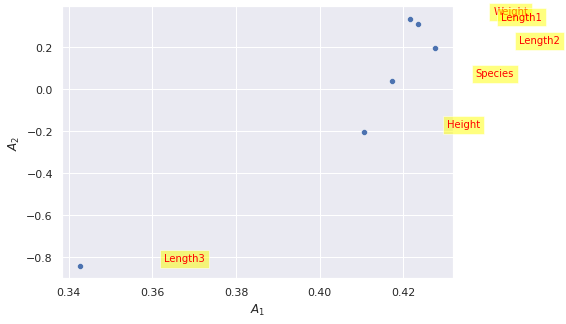

In [54]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Text(0, 0.5, 'Explained variance')

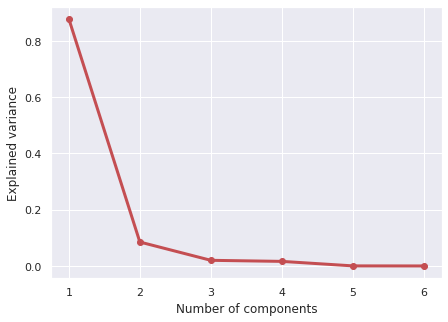

In [55]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

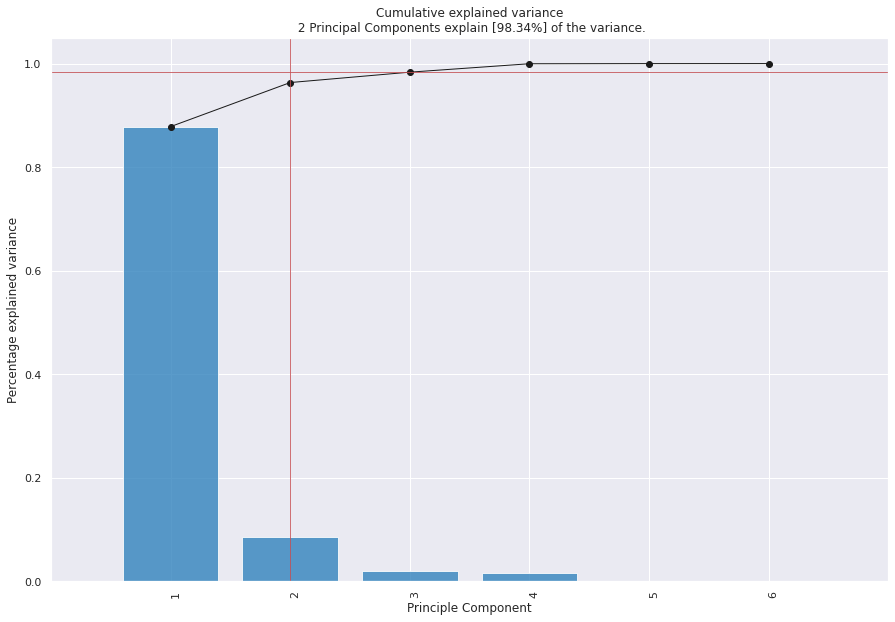

<Figure size 504x360 with 0 Axes>

In [56]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [159] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [159] unique colors! Available unique colors: [9].


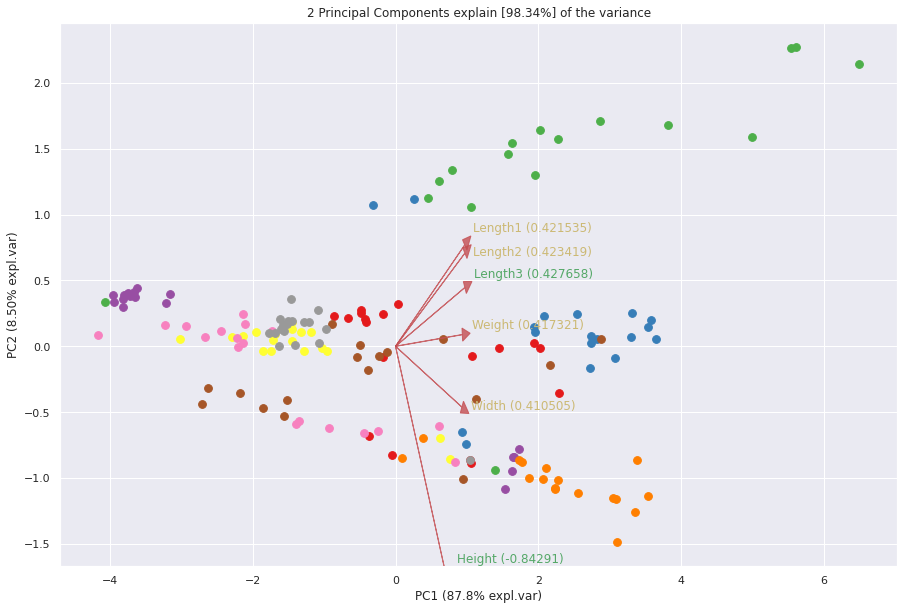

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbd52a83f10>)

In [36]:
model.biplot(label=False, legend=False)

In [57]:
# For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [61]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (143, 7)
Unseen Data For Predictions: (16, 7)


In [62]:
from pycaret.classification import *
clf = setup(data=data, target='Species', train_size=0.7, session_id=123)

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                                Value  
0                                                 123  
1                                             Species  
2                                          Multiclass  
3   Bream: 0, Parkki: 1, Perch: 2, Pike: 3, Roach:...  
4                                            (143, 7)  
5                                               False  
6                                                   6  
7                                                   0  
8                                               False  
9                                               False  
10                                               None  
11                                           (100, 4)  
12                                            (43, 4)  
13                                               True  
14                                              False  
15                                    StratifiedKFold  
16                                                 10  
17                                                 -1  
18                                              False  
19                                              False  
20                                   clf-default

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [63]:
#show the best model and their statistics
best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression      0.83  0.0964  0.8086  0.7765   
lda          Linear Discriminant Analysis      0.81  0.0975  0.8127  0.7870   
qda       Quadratic Discriminant Analysis      0.78  0.0854  0.7978  0.7757   
rf               Random Forest Classifier      0.76  0.0899  0.7699  0.7357   
et                 Extra Trees Classifier      0.75  0.0891  0.7725  0.7335   
dt               Decision Tree Classifier      0.74  0.0866  0.7711  0.7467   
ridge                    Ridge Classifier      0.73  0.0000  0.6330  0.5718   
lightgbm  Light Gradient Boosting Machine      0.72  0.0905  0.6831  0.6677   
nb                            Naive Bayes      0.67  0.0780  0.7366  0.6738   
gbc          Gradient Boosting Classifier      0.67  0.0871  0.6295  0.6633   
ada                  Ada Boost Classifier      0.58  0.0755  0.4929  0.4311   
knn                K Neighbors Classifier      0.56  0.0712  0.5062  0.4955   
dummy                    Dummy Classifier      0.36  0.0500  0.1676  0.1320   
svm                   SVM - Linear Kernel      0.24  0.0000  0.1611  0.1034   

              F1   Kappa     MCC  TT (Sec)  
lr        0.7963  0.7778  0.7909     0.645  
lda       0.7867  0.7568  0.7737     0.017  
qda       0.7555  0.7201  0.7374     0.022  
rf        0.7407  0.6913  0.7007     0.209  
et        0.7313  0.6810  0.6924     0.166  
dt        0.7338  0.6764  0.6839     0.015  
ridge     0.6324  0.6353  0.6752     0.014  
lightgbm  0.6854  0.6431  0.6574     0.132  
nb        0.6468  0.5891  0.6133     0.014  
gbc       0.6546  0.5819  0.5976     0.428  
ada       0.4719  0.4043  0.4741     0.102  
knn       0.5076  0.4154  0.4421     0.018  
dummy     0.1925  0.0000  0.0000     0.013  
svm       0.1363  0.0407  0.0521     0.018

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [64]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
lda = create_model('lda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7000  0.0000  0.7778  0.6833  0.6567  0.6429  0.6836
1       0.8000  0.0000  0.9167  0.9000  0.8000  0.7561  0.7854
2       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.8000  0.0000  0.6786  0.8000  0.8000  0.7403  0.7500
4       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8000  0.0000  0.7917  0.8000  0.8000  0.7368  0.7368
6       0.8000  0.0000  0.8000  0.6667  0.7200  0.7143  0.7632
7       0.7000  0.0000  0.6944  0.6667  0.6800  0.6203  0.6284
8       0.9000  0.9750  0.8571  0.8333  0.8600  0.8765  0.8878
9       0.6000  0.0000  0.6111  0.5200  0.5500  0.4805  0.5017
Mean    0.8100  0.0975  0.8127  0.7870  0.7867  0.7568  0.7737
SD      0.1221  0.2925  0.1255  0.1473  0.1363  0.1559  0.1486

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [67]:
lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [68]:
tuned_lda = tune_model(lda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7000  0.0000  0.6944  0.7000  0.6667  0.6296  0.6456
1       0.8000  0.0000  0.9167  0.9000  0.8000  0.7561  0.7854
2       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9000  0.0000  0.8333  0.8200  0.8556  0.8630  0.8764
4       0.9000  0.0000  0.8333  0.8200  0.8556  0.8630  0.8764
5       0.9000  0.0000  0.8333  0.8200  0.8556  0.8630  0.8764
6       0.8000  0.0000  0.8000  0.6667  0.7200  0.7143  0.7632
7       0.7000  0.0000  0.6667  0.5500  0.6000  0.6053  0.6753
8       0.7000  0.9764  0.7143  0.5500  0.6000  0.6154  0.6843
9       0.7000  0.0000  0.6667  0.5500  0.6000  0.6053  0.6753
Mean    0.8100  0.0976  0.7959  0.7377  0.7553  0.7515  0.7858
SD      0.1044  0.2929  0.1053  0.1509  0.1317  0.1329  0.1120

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [69]:
tuned_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [71]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

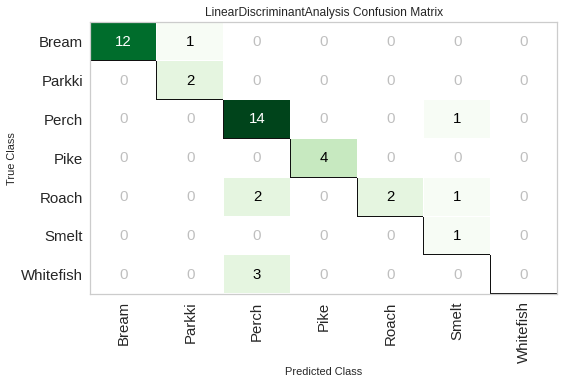

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [72]:
evaluate_model(tuned_lda)

In [73]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4000  0.0000  0.4048  0.4500  0.4000  0.2857  0.3000
1       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.7000  0.0000  0.6250  0.6833  0.6695  0.6154  0.6316
3       0.8000  0.0000  0.7917  0.7333  0.7600  0.7333  0.7435
4       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.6000  0.0000  0.7083  0.6500  0.6000  0.5122  0.5320
6       0.7000  0.0000  0.8000  0.7333  0.7086  0.6053  0.6134
7       0.8000  0.0000  0.8611  0.8000  0.8000  0.7500  0.7500
8       0.8000  0.8661  0.8810  0.8000  0.8000  0.7561  0.7561
9       0.6000  0.0000  0.6389  0.6167  0.6000  0.5062  0.5125
Mean    0.7400  0.0866  0.7711  0.7467  0.7338  0.6764  0.6839
SD      0.1744  0.2598  0.1741  0.1590  0.1741  0.2102  0.2051

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [90]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [91]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6000  0.0000  0.5556  0.6500  0.6200  0.5122  0.5317
1       0.9000  0.0000  0.8333  0.8200  0.8556  0.8630  0.8764
2       0.9000  0.0000  0.8333  0.8333  0.8600  0.8667  0.8787
3       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8000  0.0000  0.7917  0.7500  0.7667  0.7368  0.7467
6       0.9000  0.0000  0.9000  0.9200  0.8889  0.8611  0.8740
7       0.7000  0.0000  0.6944  0.6667  0.6800  0.6203  0.6284
8       0.6000  0.8025  0.6667  0.5200  0.5500  0.4937  0.5148
9       0.6000  0.0000  0.5278  0.5500  0.5667  0.5000  0.5064
Mean    0.8000  0.0802  0.7803  0.7710  0.7788  0.7454  0.7557
SD      0.1549  0.2407  0.1585  0.1647  0.1597  0.1911  0.1870

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [92]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [75]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [77]:
gbc = create_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.0000  0.4762  0.4500  0.4667  0.3976  0.4125
1       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9000  0.0000  0.7143  0.9000  0.9000  0.8701  0.8816
3       0.7000  0.0000  0.6250  0.6333  0.6600  0.6000  0.6083
4       0.5000  0.0000  0.3571  0.5000  0.5000  0.3506  0.3600
5       0.5000  0.0000  0.4643  0.5333  0.5143  0.3750  0.3847
6       0.8000  0.0000  0.9000  0.9000  0.8000  0.7436  0.7838
7       0.7000  0.0000  0.5952  0.7500  0.7048  0.6250  0.6412
8       0.5000  0.8706  0.5238  0.4000  0.4333  0.3506  0.3849
9       0.6000  0.0000  0.6389  0.5667  0.5667  0.5062  0.5190
Mean    0.6700  0.0871  0.6295  0.6633  0.6546  0.5819  0.5976
SD      0.1735  0.2612  0.1884  0.2004  0.1841  0.2181  0.2160

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [93]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [78]:
tuned_gbc = tune_model(gbc)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0         0.60  0.0000  0.6111  0.5500  0.5714  0.5000  0.5199
1         0.90  0.0000  0.9583  0.9500  0.9095  0.8734  0.8849
2         0.80  0.0000  0.7917  0.8333  0.7929  0.7468  0.7763
3         0.60  0.0000  0.4583  0.5333  0.5600  0.4667  0.4799
4         0.90  0.0000  0.8333  0.8200  0.8556  0.8630  0.8764
5         0.70  0.0000  0.6250  0.6400  0.6667  0.5890  0.5981
6         0.80  0.0000  0.8500  0.8000  0.8000  0.7297  0.7297
7         0.60  0.0000  0.5000  0.4500  0.5000  0.4667  0.5138
8         0.70  0.8867  0.6429  0.5800  0.6250  0.6154  0.6428
9         0.70  0.0000  0.6944  0.6500  0.6714  0.6154  0.6239
Mean      0.73  0.0887  0.6965  0.6807  0.6952  0.6466  0.6646
SD        0.11  0.2660  0.1518  0.1530  0.1305  0.1438  0.1394

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [94]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [79]:
evaluate_model(tuned_gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [80]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4000  0.0000  0.3889  0.3750  0.3857  0.2308  0.2339
1       0.5000  0.0000  0.4167  0.4167  0.4286  0.3506  0.3702
2       0.6000  0.0000  0.6667  0.5667  0.5619  0.4937  0.5065
3       0.5000  0.0000  0.3750  0.3714  0.4182  0.2537  0.2875
4       0.8000  0.0000  0.6786  0.8000  0.8000  0.7403  0.7500
5       0.5000  0.0000  0.3333  0.3286  0.3909  0.2754  0.3146
6       0.5000  0.0000  0.5000  0.6333  0.5419  0.3506  0.3600
7       0.7000  0.0000  0.6667  0.5133  0.5850  0.6104  0.6568
8       0.5000  0.7117  0.4524  0.4000  0.4333  0.3421  0.3770
9       0.6000  0.0000  0.5833  0.5500  0.5305  0.5062  0.5642
Mean    0.5600  0.0712  0.5062  0.4955  0.5076  0.4154  0.4421
SD      0.1114  0.2135  0.1261  0.1390  0.1202  0.1586  0.1611

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [81]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4000  0.0000  0.3889  0.5600  0.4417  0.2308  0.2405
1       0.5000  0.0000  0.4167  0.4667  0.4619  0.3506  0.3702
2       0.7000  0.0000  0.6250  0.7000  0.7000  0.6053  0.6134
3       0.6000  0.0000  0.4583  0.4333  0.5000  0.4203  0.4527
4       0.6000  0.0000  0.5000  0.5667  0.5619  0.4872  0.5137
5       0.6000  0.0000  0.4583  0.5000  0.5400  0.4286  0.4519
6       0.6000  0.0000  0.5000  0.8000  0.6333  0.5000  0.5334
7       0.6000  0.0000  0.6111  0.5000  0.5333  0.4937  0.5139
8       0.2000  0.6083  0.2857  0.1333  0.1500  0.0123  0.0130
9       0.5000  0.0000  0.5278  0.4833  0.4548  0.3827  0.4085
Mean    0.5300  0.0608  0.4772  0.5143  0.4977  0.3911  0.4111
SD      0.1345  0.1825  0.0960  0.1662  0.1392  0.1583  0.1642

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [82]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [95]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.0000  0.7500  0.7750  0.7571  0.7468  0.7668
1       0.7000  0.0000  0.7500  0.7167  0.6952  0.6203  0.6284
2       0.8000  0.0000  0.6667  0.6533  0.7156  0.7222  0.7456
3       0.9000  0.0000  0.8333  0.8200  0.8556  0.8630  0.8764
4       0.9000  0.0000  0.8333  0.8200  0.8556  0.8630  0.8764
5       0.9000  0.0000  0.8333  0.8200  0.8556  0.8630  0.8764
6       0.8000  0.0000  0.8000  0.6667  0.7200  0.7143  0.7632
7       0.7000  0.0000  0.6667  0.5500  0.6000  0.6053  0.6753
8       0.7000  0.9496  0.7143  0.5500  0.6000  0.6154  0.6843
9       0.7000  0.0000  0.6667  0.5500  0.6000  0.6053  0.6753
Mean    0.7900  0.0950  0.7514  0.6922  0.7255  0.7219  0.7568
SD      0.0831  0.2849  0.0674  0.1092  0.1000  0.1045  0.0884

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [96]:
tuned_best_model

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [98]:
clf_pca = setup(data=data, target='Species', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                                Value  
0                                                 123  
1                                             Species  
2                                          Multiclass  
3   Bream: 0, Parkki: 1, Perch: 2, Pike: 3, Roach:...  
4                                            (143, 7)  
5                                               False  
6                                                   6  
7                                                   0  
8                                               False  
9                                               False  
10                                               None  
11                                           (100, 2)  
12                                            (43, 2)  
13                                               True  
14                                              False  
15                                    StratifiedKFold  
16                                                 10  
17                                                 -1  
18                                              False  
19                                              False  
20                                   clf-default

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('dummy', Dummify(target='Species')),
                ('fix_perfect', Remove_100(target='Species')),
                ('clean_names', Clean_Colum_Names()),
   

In [99]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis      0.82  0.0925  0.8312  0.8100   
et                 Extra Trees Classifier      0.82  0.0920  0.7963  0.7980   
nb                            Naive Bayes      0.80  0.0923  0.8029  0.8070   
rf               Random Forest Classifier      0.80  0.0893  0.7808  0.7650   
lda          Linear Discriminant Analysis      0.80  0.0950  0.7681  0.7088   
dt               Decision Tree Classifier      0.78  0.0795  0.7499  0.7353   
gbc          Gradient Boosting Classifier      0.78  0.0854  0.7514  0.7330   
lr                    Logistic Regression      0.76  0.0934  0.7042  0.6469   
lightgbm  Light Gradient Boosting Machine      0.76  0.1000  0.7463  0.7467   
knn                K Neighbors Classifier      0.75  0.0850  0.7204  0.7080   
ada                  Ada Boost Classifier      0.72  0.0785  0.6163  0.5743   
svm                   SVM - Linear Kernel      0.68  0.0000  0.6451  0.6889   
ridge                    Ridge Classifier      0.60  0.0000  0.4898  0.4390   
dummy                    Dummy Classifier      0.36  0.0500  0.1676  0.1320   

              F1   Kappa     MCC  TT (Sec)  
qda       0.7973  0.7731  0.7882     0.015  
et        0.7959  0.7691  0.7871     0.178  
nb        0.7823  0.7476  0.7630     0.013  
rf        0.7748  0.7421  0.7560     0.207  
lda       0.7395  0.7359  0.7699     0.015  
dt        0.7508  0.7183  0.7309     0.016  
gbc       0.7445  0.7181  0.7412     0.411  
lr        0.6873  0.6778  0.7199     0.031  
lightgbm  0.7463  0.6946  0.7053     0.060  
knn       0.7177  0.6732  0.6885     0.023  
ada       0.6268  0.6128  0.6703     0.088  
svm       0.6526  0.5937  0.6382     0.022  
ridge     0.4945  0.4494  0.5008     0.013  
dummy     0.1925  0.0000  0.0000     0.015

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [100]:
best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [101]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.0000  0.8611  0.9000  0.8067  0.7590  0.7778
1       0.9000  0.0000  0.9583  0.9500  0.9095  0.8734  0.8849
2       0.7000  0.0000  0.7500  0.7667  0.6767  0.6296  0.6711
3       0.9000  0.0000  0.9583  0.9500  0.9095  0.8734  0.8849
4       0.9000  0.0000  0.9583  0.9500  0.9095  0.8734  0.8849
5       0.9000  0.0000  0.8333  0.8200  0.8556  0.8630  0.8764
6       0.8000  0.0000  0.8500  0.8000  0.8000  0.7297  0.7297
7       0.6000  0.0000  0.6389  0.5667  0.5800  0.4937  0.5002
8       0.5000  0.8817  0.5238  0.4000  0.4333  0.3506  0.3849
9       0.6000  0.0000  0.6389  0.5667  0.5800  0.4937  0.5002
Mean    0.7600  0.0882  0.7971  0.7670  0.7461  0.6940  0.7095
SD      0.1428  0.2645  0.1460  0.1836  0.1602  0.1825  0.1788

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [102]:
tuned_best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [104]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [105]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
import shap

In [107]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7000  0.0000  0.6190  0.7500  0.7200  0.6386  0.6465
1       0.9000  0.0000  0.9583  0.9500  0.9095  0.8734  0.8849
2       0.9000  0.0000  0.8333  0.8333  0.8600  0.8667  0.8787
3       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8000  0.0000  0.6667  0.6667  0.7200  0.7143  0.7531
5       0.9000  0.0000  0.8333  0.8200  0.8556  0.8630  0.8764
6       0.8000  0.0000  0.8500  0.8000  0.8000  0.7297  0.7297
7       0.6000  0.0000  0.6389  0.6000  0.5867  0.5000  0.5199
8       0.7000  0.8929  0.7143  0.5800  0.6250  0.6203  0.6468
9       0.7000  0.0000  0.6944  0.6500  0.6714  0.6154  0.6239
Mean    0.8000  0.0893  0.7808  0.7650  0.7748  0.7421  0.7560
SD      0.1183  0.2679  0.1269  0.1353  0.1256  0.1466  0.1427

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [108]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7000  0.0000  0.6905  0.9000  0.7167  0.6512  0.6831
1       0.8000  0.0000  0.9167  0.9000  0.8000  0.7561  0.7854
2       0.8000  0.0000  0.7917  0.7833  0.7695  0.7436  0.7632
3       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9000  0.0000  0.9583  0.9500  0.9095  0.8734  0.8849
5       0.8000  0.0000  0.7917  0.7333  0.7600  0.7333  0.7435
6       0.8000  0.0000  0.8500  0.8000  0.8000  0.7297  0.7297
7       0.6000  0.0000  0.6389  0.6000  0.5867  0.5000  0.5199
8       0.9000  0.9446  0.9286  0.9250  0.8905  0.8765  0.8878
9       0.7000  0.0000  0.6944  0.7000  0.7000  0.6250  0.6250
Mean    0.8000  0.0945  0.8261  0.8292  0.7933  0.7489  0.7622
SD      0.1095  0.2834  0.1184  0.1201  0.1117  0.1351  0.1316

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


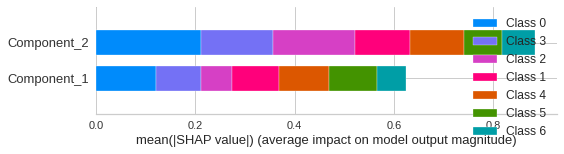

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [109]:
interpret_model(tuned_rf_pca, plot='summary')

In [110]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [111]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
